In [1]:
from environment import GridEnv
from mc import MonteCarlo
from ql import QLearning

import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

## Deterministic Environment

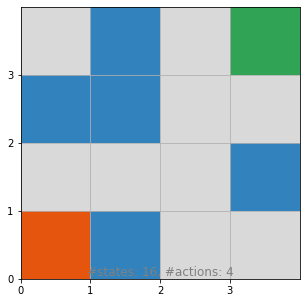

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
)

### Monte Carlo

In [4]:
mc = MonteCarlo(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    episodes=500,
)

# train 
policy_mc, Q_mc = mc.run()
# evaluate
mc.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc.env.w, mc.env.h), unicode=True)
for key, value in policy_mc.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'l'],
           ['u', 'r', 'u', 'u'],
           ['r', 'r', 'u', 'u'],
           ['u', 'r', 'u', 'r']], dtype='<U1')

### Q-Learning

In [5]:
ql = QLearning(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    step_size=0.01,
    episodes=500,
)

# train 
policy_ql, Q_ql = ql.run()
# evaluate
ql.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((ql.env.w, ql.env.h), unicode=True)
for key, value in policy_ql.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'l', 'r', 'r'],
           ['u', 'r', 'r', 'u'],
           ['r', 'r', 'u', 'u'],
           ['u', 'u', 'u', 'l']], dtype='<U1')

#### Visualisations

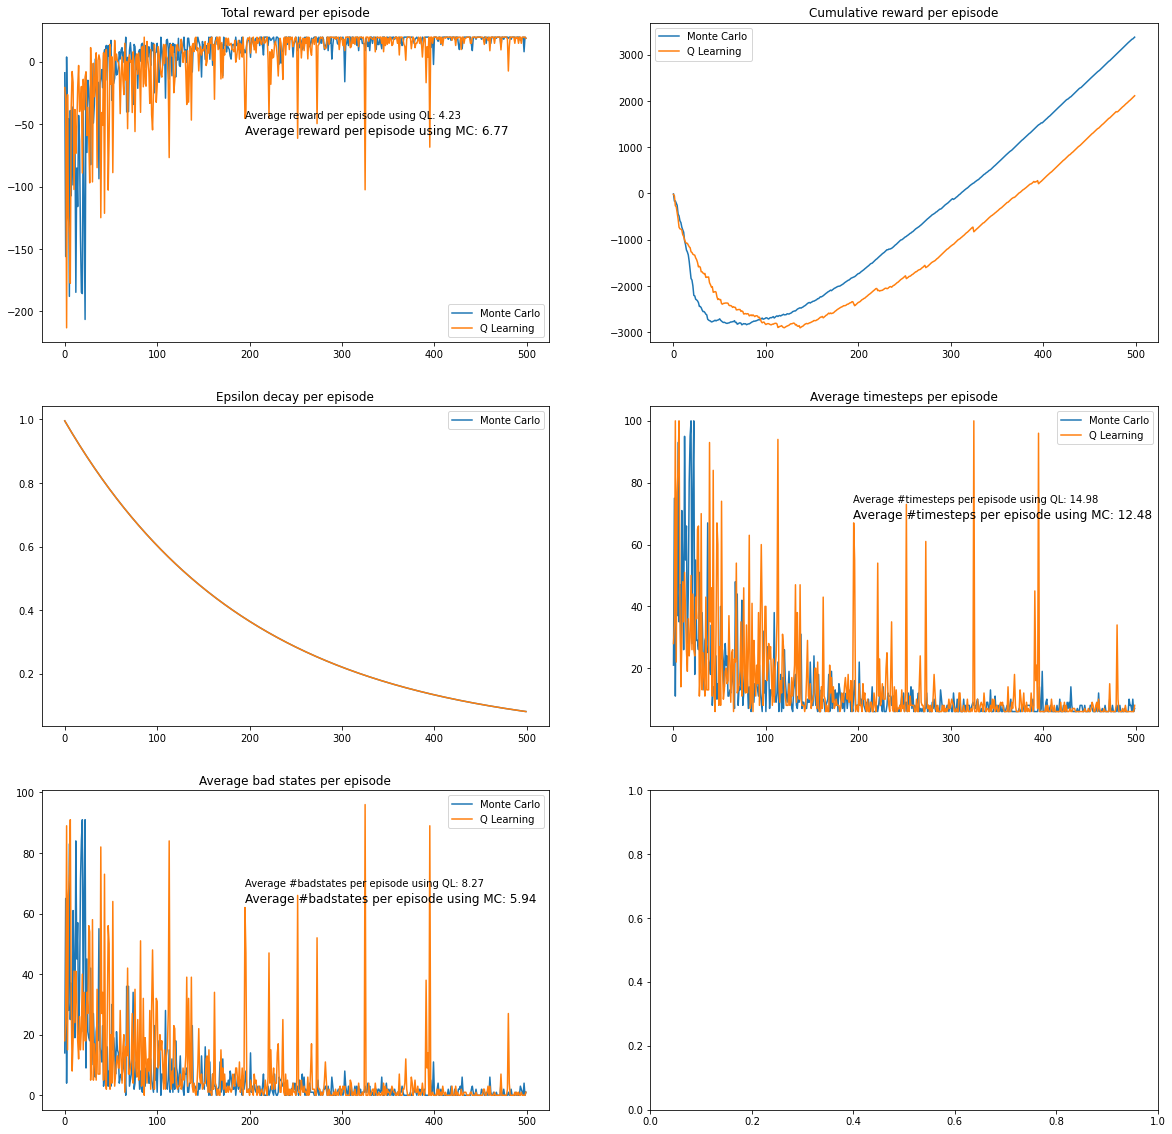

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards_mc = [log['reward'] for _, log in mc.logs.items()]
mean_rewards_mc = sum(total_rewards_mc)/len(total_rewards_mc)
ax[0][0].plot(range(mc.episodes), total_rewards_mc, label='Monte Carlo')
ax[0][0].text(0.4, 0.65, f'Average reward per episode using MC: {round(mean_rewards_mc, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards_mc = [log['cumulative_reward'] for _, log in mc.logs.items()]
ax[0][1].plot(range(mc.episodes), cumulative_rewards_mc, label='Monte Carlo')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(mc.episodes), [log['epsilon'] for _, log in mc.logs.items()], label='Monte Carlo')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()

timesteps_mc = [log['timesteps'] for _, log in mc.logs.items()]
mean_timesteps_mc = sum(timesteps_mc)/len(timesteps_mc)
ax[1][1].plot(range(mc.episodes), timesteps_mc, label='Monte Carlo')
ax[1][1].text(0.4, 0.65, f'Average #timesteps per episode using MC: {round(mean_timesteps_mc, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')
ax[1][1].legend()

bad_state_count_mc = [log['bad_state_count'] for _, log in mc.logs.items()]
mean_bad_states_count_mc = sum(bad_state_count_mc)/len(bad_state_count_mc)
ax[2][0].plot(range(mc.episodes), [log['bad_state_count'] for _, log in mc.logs.items()], label='Monte Carlo')
ax[2][0].text(0.4, 0.65, f'Average #badstates per episode using MC: {round(mean_bad_states_count_mc, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')
ax[2][0].legend()

#---------------------------------------------------------------------------------------------------------------------------

total_rewards = [log['reward'] for _, log in ql.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(ql.episodes), total_rewards, label='Q Learning')
ax[0][0].text(0.4, 0.7, f'Average reward per episode using QL: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes)
ax[0][0].legend()

cumulative_rewards = [log['cumulative_reward'] for _, log in ql.logs.items()]
ax[0][1].plot(range(ql.episodes), cumulative_rewards, label='Q Learning')
ax[0][1].legend()

ax[1][0].plot(range(ql.episodes), [log['epsilon'] for _, log in ql.logs.items()])
ax[1][0].legend()

timesteps = [log['timesteps'] for _, log in ql.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(ql.episodes), timesteps, label='Q Learning')
ax[1][1].text(0.4, 0.7, f'Average #timesteps per episode using QL: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes)
ax[1][1].legend()

bad_state_count = [log['bad_state_count'] for _, log in ql.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(ql.episodes), [log['bad_state_count'] for _, log in ql.logs.items()], label='Q Learning')
ax[2][0].text(0.4, 0.7, f'Average #badstates per episode using QL: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes)
ax[2][0].legend()

## Stochastic Environment

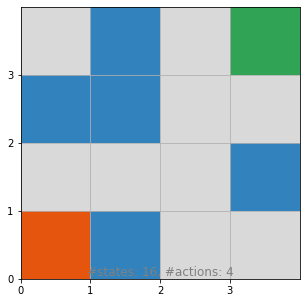

In [7]:
stochastic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=True,
    action_transitions={
        'w': 0.78,
        's': 0.76,
        'd': 0.72,
        'a': 0.79,
    },
    max_timesteps=180,
)

### Monte Carlo

In [8]:
mc = MonteCarlo(
    env=stochastic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    episodes=500,
)

# train 
policy_mc, Q_mc = mc.run()
# evaluate
mc.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((mc.env.w, mc.env.h), unicode=True)
for key, value in policy_mc.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['r', 'r', 'r', 'l'],
           ['u', 'r', 'r', 'u'],
           ['r', 'r', 'u', 'u'],
           ['u', 'r', 'u', 'l']], dtype='<U1')

### Q-Learning

In [9]:
ql = QLearning(
    env=stochastic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    step_size=0.01,
    episodes=500,
)

# train 
policy_ql, Q_ql = ql.run()
# evaluate
ql.evaluate()

action_dict = {'w': 'up', 's': 'down', 'a':'left', 'd':'right'}
p = np.chararray((ql.env.w, ql.env.h), unicode=True)
for key, value in policy_ql.items():
    x, y = int(key[0]), int(key[1])
    p[x][y] = action_dict[value]
    
p[::-1]

chararray([['u', 'r', 'r', 'd'],
           ['r', 'r', 'u', 'u'],
           ['r', 'r', 'l', 'u'],
           ['u', 'd', 'r', 'u']], dtype='<U1')

#### Visualisations

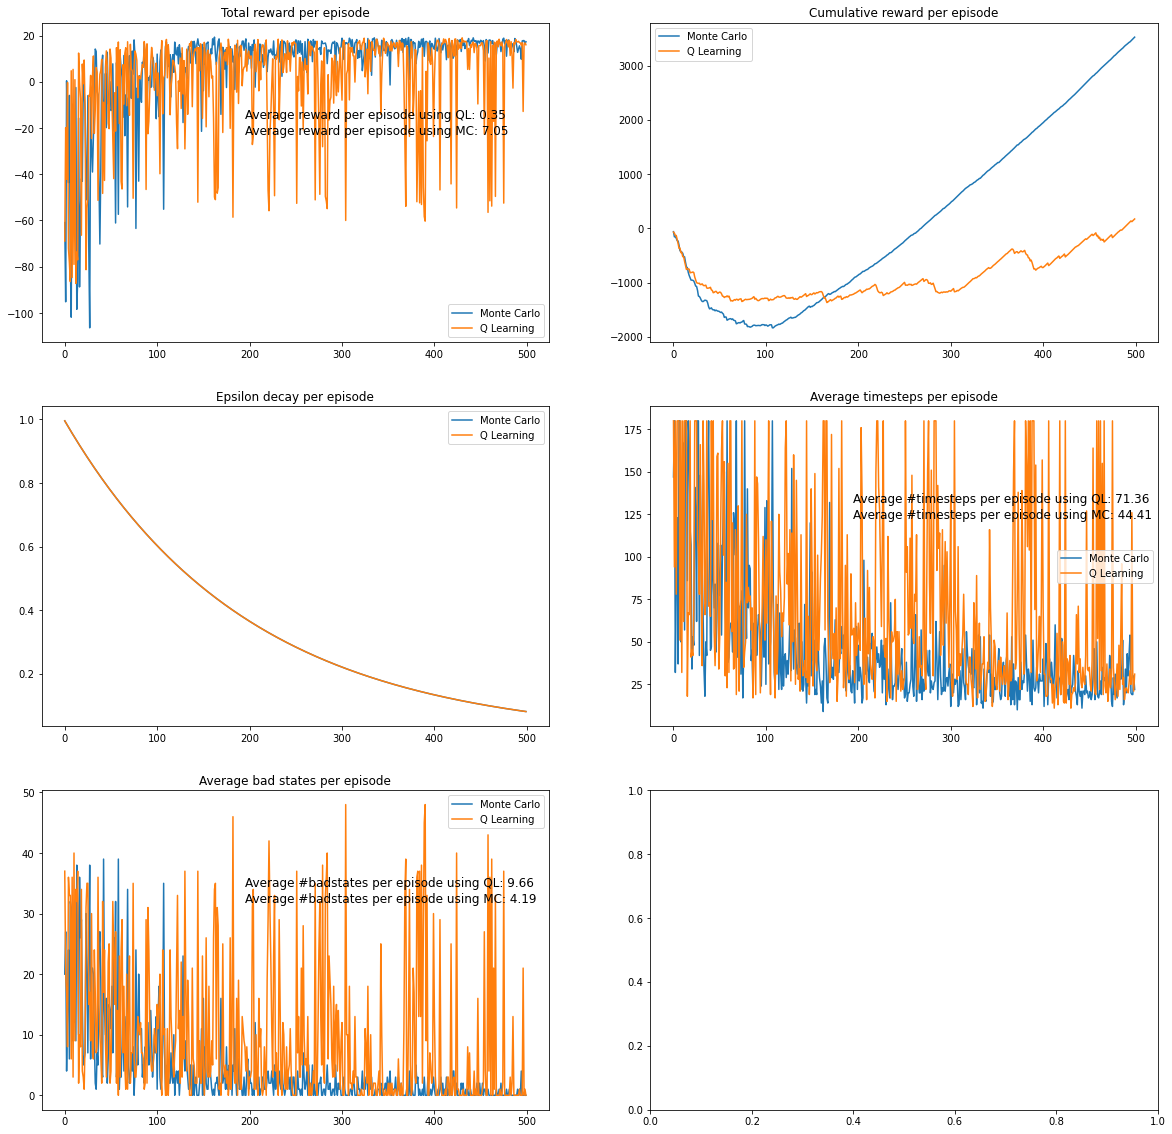

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards_mc = [log['reward'] for _, log in mc.logs.items()]
mean_rewards_mc = sum(total_rewards_mc)/len(total_rewards_mc)
ax[0][0].plot(range(mc.episodes), total_rewards_mc, label='Monte Carlo')
ax[0][0].text(0.4, 0.65, f'Average reward per episode using MC: {round(mean_rewards_mc, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards_mc = [log['cumulative_reward'] for _, log in mc.logs.items()]
ax[0][1].plot(range(mc.episodes), cumulative_rewards_mc, label='Monte Carlo')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(mc.episodes), [log['epsilon'] for _, log in mc.logs.items()], label='Monte Carlo')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()

timesteps_mc = [log['timesteps'] for _, log in mc.logs.items()]
mean_timesteps_mc = sum(timesteps_mc)/len(timesteps_mc)
ax[1][1].plot(range(mc.episodes), timesteps_mc, label='Monte Carlo')
ax[1][1].text(0.4, 0.65, f'Average #timesteps per episode using MC: {round(mean_timesteps_mc, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].set_title('Average timesteps per episode')
ax[1][1].legend()

bad_state_count_mc = [log['bad_state_count'] for _, log in mc.logs.items()]
mean_bad_states_count_mc = sum(bad_state_count_mc)/len(bad_state_count_mc)
ax[2][0].plot(range(mc.episodes), [log['bad_state_count'] for _, log in mc.logs.items()], label='Monte Carlo')
ax[2][0].text(0.4, 0.65, f'Average #badstates per episode using MC: {round(mean_bad_states_count_mc, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].set_title('Average bad states per episode')
ax[2][0].legend()

#---------------------------------------------------------------------------------------------------------------------------

total_rewards = [log['reward'] for _, log in ql.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(ql.episodes), total_rewards, label='Q Learning')
ax[0][0].text(0.4, 0.7, f'Average reward per episode using QL: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].legend()

cumulative_rewards = [log['cumulative_reward'] for _, log in ql.logs.items()]
ax[0][1].plot(range(ql.episodes), cumulative_rewards, label='Q Learning')
ax[0][1].legend()

ax[1][0].plot(range(ql.episodes), [log['epsilon'] for _, log in ql.logs.items()], label='Q Learning')
ax[1][0].legend()

timesteps = [log['timesteps'] for _, log in ql.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(ql.episodes), timesteps, label='Q Learning')
ax[1][1].text(0.4, 0.7, f'Average #timesteps per episode using QL: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].legend()

bad_state_count = [log['bad_state_count'] for _, log in ql.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(ql.episodes), [log['bad_state_count'] for _, log in ql.logs.items()], label='Q Learning')
ax[2][0].text(0.4, 0.7, f'Average #badstates per episode using QL: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].legend()